In [109]:
using LinearAlgebra, Plots, Statistics
# include("../src/hamiltonian.jl")
include("../src/graphs.jl")
include("../src/observables.jl")

binned_average (generic function with 2 methods)

In [110]:
SIZE_LIST = [20 40 80]
NUM_DISORDER_REALIZATIONS = 500
DISORDER_LIST = 10 .^ LinRange(-2, 2, 16)

16-element Vector{Float64}:
   0.01
   0.018478497974222907
   0.034145488738336005
   0.0630957344480193
   0.11659144011798314
   0.21544346900318828
   0.3981071705534973
   0.7356422544596414
   1.3593563908785256
   2.5118864315095797
   4.6415888336127775
   8.576958985908938
  15.848931924611142
  29.286445646252375
  54.116952654646376
 100.0

In [111]:
function compute_agr_per_size_and_disorder(sizes, disorders, num_samples)
    agrs = zeros(length(sizes), length(disorders))
    agrs_std = zeros(length(sizes), length(disorders))
    for (size_idx, L) in enumerate(SIZE_LIST)
        graph = chain_graph(L, periodic=false)
        for (disorder_idx, disorder) in enumerate(disorders)
            agr_sample_arr = zeros(num_samples)
            for k in 1:num_samples
                # ham = simple_hamiltonian(L, t, disorder, E)
                ham = hamiltonian_from_graph(graph, disorder * rand(nv(graph)), 1.0) 
                evals_list = eigvals(ham)
                agr_sample_arr[k] = adjacent_gap_ratio(evals_list, 2)
            end
            agrs[size_idx, disorder_idx] = mean(agr_sample_arr)
            agrs_std[size_idx, disorder_idx] = stdm(agr_sample_arr, agrs[size_idx, disorder_idx])
        end
    end

    return agrs, agrs_std
end

agr_arr, agr_std_arr = compute_agr_per_size_and_disorder(SIZE_LIST, DISORDER_LIST, NUM_DISORDER_REALIZATIONS)

MethodError: MethodError: no method matching adjacent_gap_ratio(::Vector{Float64}, ::Int64)
Closest candidates are:
  adjacent_gap_ratio(::Vector{<:Real}; offset) at ~/Dropbox/progra/julia/PKS_Julia_Hackathon/src/observables.jl:51

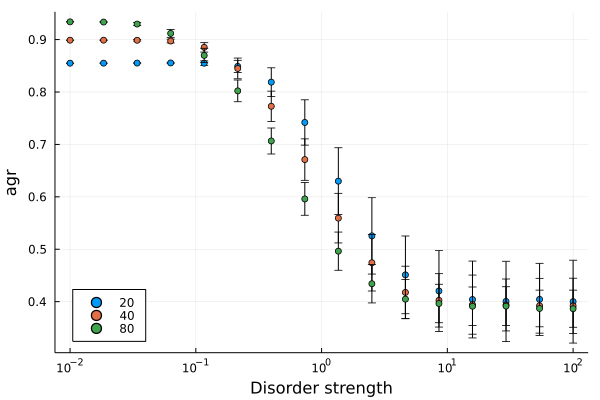

In [112]:
plot_inst = scatter(
    xaxis = :log,
    legend = :bottomleft,
    ylabel = "agr",
    xlabel = "Disorder strength"
    )
    
for (L, agr, agr_std) in zip(SIZE_LIST, eachrow(agr_arr), eachrow(agr_std_arr))
    scatter!(DISORDER_LIST, agr, yerr=agr_std, label=L)
end

plot_inst

In [113]:
using LinearAlgebra, Plots, Statistics
include("../src/hamiltonian.jl")
include("../src/agr.jl")
t   = 0.5 # hopping
E   = 2   # on-site energy
size_number = 30
disorder_realization = 30
agrs = Array{Float64, 1}(undef, size_number)
for j in 1:size_number
    size = 10+10*j
    agr_realization = 0
    k=1
    while k <= disorder_realization
        ham = simple_hamiltonian(size, t, 0.001, E)
        evals_list = eigvals(ham)
        agr_realization += agr(evals_list)
        k+=1
    end
    agrs[j] = agr_realization / disorder_realization
end


SystemError: SystemError: opening file "/Users/placke/Dropbox/progra/julia/PKS_Julia_Hackathon/src/agr.jl": No such file or directory

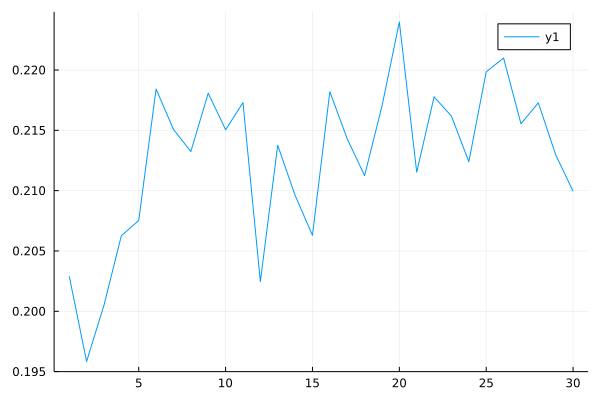

In [114]:
plot(agrs)